In [1]:
import sys 
sys.path.append("..") 
import os

import numpy as np
from braiding_model import BraidOperator, show_braid_words
from braiding_model import GeneratorBraid, obtain_model_braid, obtain_model_torus_knot
from braiding_model import sigma_z, sigma_x, sigma_y, sigma_0
from braiding_model import PerturbationModel

from machine_learning import Classifier, Cluster
from topology import topology_comparator, similarity_function
from functools import partial

import matplotlib.pyplot as plt

p1 = PerturbationModel()
p1.set_parameters(t1=0.1,t2=0.0)

p2 = PerturbationModel()
p2.set_parameters(t1=-0.1,t2=0.0)

p3 = PerturbationModel()
p3.set_parameters(t1=0.1,t2=0.1)

p4 = PerturbationModel()
p4.set_parameters(t1=0.0,t2=-0.1)

perturbations = [p1,p2,p3,p4]

np.seterr(all="ignore") # ignore some numerical errors

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# test

In [8]:
n_band = 3
braid_operator_list = [
    BraidOperator(1), BraidOperator(1, True),
    BraidOperator(2), BraidOperator(2, True)
]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

#models, braid_operator_list_gen = generator.get_all_combination_generate_sample(n_length=3)
#models, braid_operator_list_gen = generator.get_permutation_generate_sample(n_permutation=3)
models, braid_operator_list_gen = generator.get_random_generate_sample(n_sample=100, n_max_operator=5)
print("The number of braids: ", len(braid_operator_list_gen))

for operator_list in braid_operator_list_gen[:10]:
    show_braid_words(operator_list)

The number of braids:  100


$\sigma_1$ $\sigma^{-1}_2$ $\sigma^{-1}_1$ $\sigma_2$ $\sigma_1$ 

$\sigma^{-1}_2$ $\sigma^{-1}_2$ $\sigma^{-1}_1$ $\sigma^{-1}_2$ $\sigma_1$ 

$\sigma^{-1}_1$ $\sigma_2$ $\sigma^{-1}_1$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_1$ $\sigma^{-1}_1$ $\sigma_2$ $\sigma_1$ 

$\sigma^{-1}_2$ 

$\sigma^{-1}_1$ $\sigma^{-1}_2$ 

$\sigma^{-1}_2$ $\sigma^{-1}_2$ $\sigma_1$ $\sigma_2$ $\sigma_1$ 

$\sigma_1$ $\sigma^{-1}_1$ $\sigma^{-1}_1$ $\sigma_2$ $\sigma^{-1}_2$ 

$\sigma_2$ $\sigma^{-1}_2$ $\sigma^{-1}_2$ $\sigma^{-1}_1$ 

# $\mathbb{B}_3$

The number of braids:  1000
Centers:  [12, 2, 15, 24, 3, 11, 39, 71, 16, 4, 45, 122, 5, 32, 25, 42, 13, 0, 38, 250, 145, 17, 48, 9, 66, 86, 120, 111, 40, 61, 217, 35, 26, 6, 161, 64, 75, 158, 115, 107, 103, 275, 100, 53, 222, 317, 596, 136, 448, 52, 472, 612, 132, 294, 515, 576, 408, 367, 358, 778, 349, 320, 796, 452, 355, 258, 73, 276, 14, 207, 211, 19, 1, 978, 656, 713, 722, 745, 772, 774, 21, 298, 805, 835, 847, 876, 952, 956, 959, 968, 977, 653, 630, 91, 607, 357, 233, 392, 183, 410, 141, 451, 130, 231, 468, 505, 316, 537, 571, 574, 304, 593, 102, 10, 996]
The number of samples:  [102, 90, 89, 86, 67, 25, 25, 23, 21, 21, 21, 20, 18, 18, 18, 17, 15, 14, 13, 13, 12, 11, 11, 11, 10, 10, 9, 8, 8, 7, 7, 7, 6, 6, 6, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


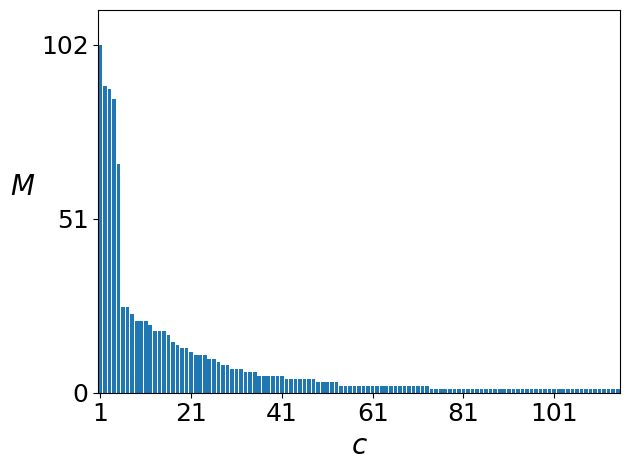

In [20]:
n_band = 3
n_max_operator = 5
n_sample = 1000
braid_operator_list = [
    BraidOperator(1), BraidOperator(1, True),
    BraidOperator(2), BraidOperator(2, True)
]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_random_generate_sample(n_sample=n_sample, n_max_operator=n_max_operator)
print("The number of braids: ", len(braid_operator_list_gen))

n_core = 8
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

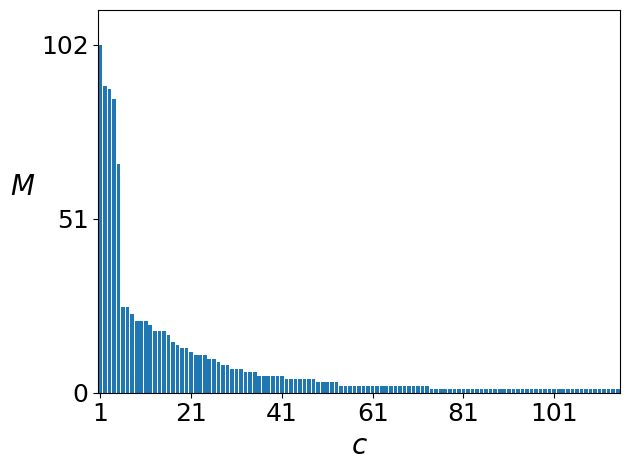

In [21]:
fig = plt.figure()
xticks = list(range(1,len(center_indices)+1, 20))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('figs_B{0}.svg'.format(n_band))

In [22]:
directory_name = 'B{0}'.format(n_band)

if not os.path.exists('./figs/more_cases/{directory_name}'.format(directory_name=directory_name)):
    os.mkdir('./figs/more_cases/{directory_name}'.format(directory_name=directory_name))

with open('./figs/more_cases/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))
    
for i, group in enumerate(groups):
    with open('./figs/more_cases/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# $\mathbb{B}_4$

The number of braids:  1000
Centers:  [0, 2, 16, 3, 24, 64, 5, 103, 4, 25, 153, 97, 170, 45, 47, 113, 32, 26, 21, 263, 239, 20, 140, 8, 109, 73, 104, 28, 175, 14, 92, 11, 193, 36, 54, 83, 322, 195, 10, 37, 150, 129, 525, 118, 115, 138, 101, 105, 67, 71, 23, 237, 40, 255, 397, 155, 146, 442, 187, 221, 435, 703, 434, 281, 408, 337, 100, 56, 61, 62, 6, 90, 9, 1, 99, 33, 282, 284, 287, 299, 319, 321, 339, 357, 368, 857, 29, 427, 430, 780, 436, 278, 454, 467, 484, 505, 779, 532, 553, 597, 638, 653, 689, 256, 438, 192, 55, 168, 117, 163, 130, 72, 210, 215, 95, 632, 777, 752, 748, 740, 738, 736, 575, 734, 731, 713, 711, 706, 131, 137, 142, 601, 686, 678, 617, 618, 619, 622, 665, 88, 623, 647, 640, 141, 635, 626, 669, 39, 574, 900, 904, 909, 914, 915, 923, 926, 931, 939, 941, 961, 964, 976, 979, 981, 896, 880, 875, 874, 793, 797, 801, 802, 805, 808, 814, 787, 836, 842, 844, 846, 849, 851, 867, 870, 837, 564, 79, 559, 332, 333, 335, 983, 207, 341, 342, 346, 348, 354, 202, 371, 377, 379, 383, 32

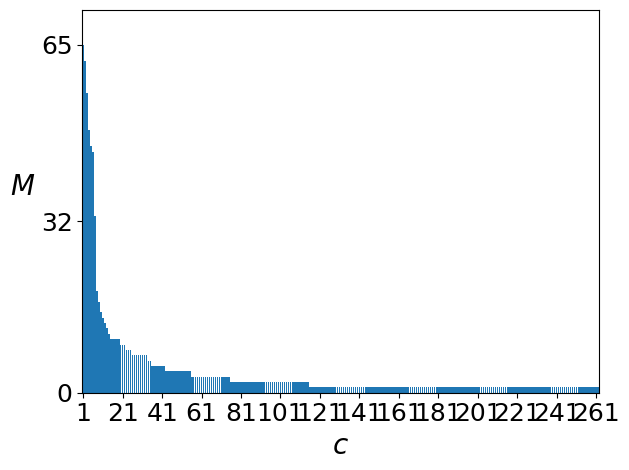

In [12]:
n_band = 4
n_max_operator = 5
n_sample = 1000
braid_operator_list = [
    BraidOperator(1), BraidOperator(1, True),
    BraidOperator(2), BraidOperator(2, True),
    BraidOperator(3), BraidOperator(3, True)
]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_random_generate_sample(n_sample=n_sample, n_max_operator=n_max_operator)
print("The number of braids: ", len(braid_operator_list_gen))

n_core = 8
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

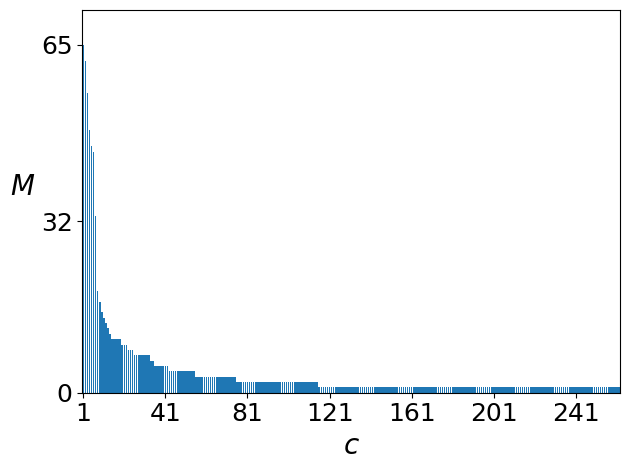

In [14]:
fig = plt.figure()
xticks = list(range(1,len(center_indices)+1, 40))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('figs_B{0}.svg'.format(n_band))

In [15]:
directory_name = 'B{0}'.format(n_band)

if not os.path.exists('./figs/more_cases/{directory_name}'.format(directory_name=directory_name)):
    os.mkdir('./figs/more_cases/{directory_name}'.format(directory_name=directory_name))

with open('./figs/more_cases/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))
    
for i, group in enumerate(groups):
    with open('./figs/more_cases/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')

# $\mathbb{B}_5$

In [16]:
n_band = 5
n_max_operator = 5
n_sample = 1000
braid_operator_list = [BraidOperator(i) for i in range(1, n_band)] + [BraidOperator(-i) for i in range(1, n_band)]
generator = GeneratorBraid(n_band=n_band, braid_operator_list=braid_operator_list)

models, braid_operator_list_gen = generator.get_random_generate_sample(n_sample=n_sample, n_max_operator=n_max_operator)
print("The number of braids: ", len(braid_operator_list_gen))

n_core = 8
fast_mode = True
func = partial(similarity_function, perturbations=perturbations, fast_mode=fast_mode)
cluster = Cluster(similarity_function=func, n_core=n_core, verbose=False)
center_indices, group_number, groups = cluster.fit(models)

print("Centers: ", center_indices)
print("The number of samples: ", group_number)

The number of braids:  1000
Centers:  [49, 9, 20, 10, 14, 41, 78, 32, 28, 68, 25, 181, 61, 65, 2, 393, 167, 22, 34, 116, 76, 27, 242, 15, 37, 235, 89, 308, 43, 105, 174, 40, 16, 342, 45, 81, 60, 403, 55, 69, 506, 91, 275, 586, 306, 623, 152, 50, 908, 88, 94, 427, 111, 329, 650, 74, 483, 145, 279, 379, 550, 250, 269, 57, 31, 53, 367, 35, 307, 436, 751, 352, 738, 239, 160, 315, 156, 446, 149, 170, 726, 828, 276, 827, 194, 552, 199, 368, 766, 270, 404, 210, 769, 450, 260, 277, 562, 124, 320, 515, 58, 56, 524, 601, 82, 33, 29, 95, 98, 482, 64, 539, 106, 12, 103, 137, 122, 5, 4, 126, 575, 107, 978, 135, 8, 712, 704, 592, 703, 729, 566, 591, 590, 589, 582, 576, 720, 708, 713, 573, 698, 638, 593, 636, 635, 645, 626, 648, 622, 649, 620, 618, 651, 615, 652, 697, 655, 610, 659, 675, 677, 609, 605, 680, 681, 599, 637, 690, 694, 658, 597, 0, 734, 913, 912, 904, 899, 898, 896, 914, 893, 889, 888, 881, 880, 879, 875, 890, 915, 917, 920, 988, 984, 979, 976, 973, 971, 969, 965, 959, 949, 941, 938, 931

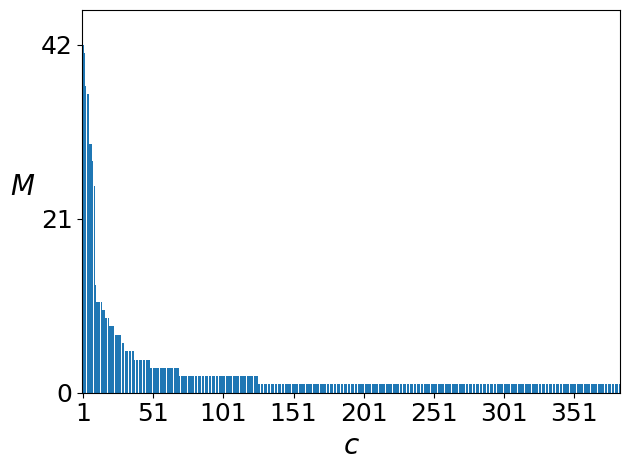

In [19]:
fig = plt.figure()
xticks = list(range(1,len(center_indices)+1, 50))
yticks = [0, int(np.max(group_number)/2), int(np.max(group_number))]

plt.bar(np.arange(len(group_number))+1, group_number)
plt.xticks(xticks,fontsize=18)
plt.yticks(yticks,fontsize=18)

plt.xlim([0.5,len(center_indices)+0.5])
plt.ylim([0, np.max(group_number)*1.1])

plt.xlabel(r"$c$",fontsize=20)
plt.ylabel(r"$M$",fontsize=20,rotation=0,horizontalalignment='right')
plt.tight_layout()
plt.savefig('figs_B{0}.svg'.format(n_band))

In [18]:
directory_name = 'B{0}'.format(n_band)

if not os.path.exists('./figs/more_cases/{directory_name}'.format(directory_name=directory_name)):
    os.mkdir('./figs/more_cases/{directory_name}'.format(directory_name=directory_name))

with open('./figs/more_cases/{directory_name}/group_number.txt'.format(directory_name=directory_name),'w') as fileop: 
    fileop.write(str(group_number))
    
for i, group in enumerate(groups):
    with open('./figs/more_cases/{directory_name}/{i}.txt'.format(directory_name=directory_name, i=i),'w') as fileop: 
        for model in [models[index] for index in groups[i]]:
            fileop.write(str([(op.get_n(), op.get_is_inverse()) for op in model.get_braid_words()])+'\n')